# Privacy Preserving Analysis of Bike Sharing Networks

## Installing Dependancies

In [ ]:
!pip install python-dp

  Using cached python_dp-1.1.4-cp310-cp310-manylinux1_x86_64.whl (3.8 MB)


## Importing Important Dependancies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pydp.algorithms.laplacian import BoundedMean, BoundedSum
import matplotlib.pyplot as plt

## Taking a Glance at Data

In [52]:
file_path = '202402-divvy-tripdata.csv'
data = pd.read_csv(file_path)
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FCB05EB1758F85E8,classic_bike,2024-02-03 14:14:18,2024-02-03 14:21:00,Clark St & Newport St,632,Southport Ave & Waveland Ave,13235,41.944540,-87.654678,41.948150,-87.663940,member
1,7FB986AD5D3DE9D6,classic_bike,2024-02-05 21:10:06,2024-02-05 21:15:44,Michigan Ave & Washington St,13001,Wabash Ave & Grand Ave,TA1307000117,41.883984,-87.624684,41.891466,-87.626761,member
2,40CA13E15B5B470D,electric_bike,2024-02-05 15:10:44,2024-02-05 15:12:32,Leavitt St & Armitage Ave,TA1309000029,Milwaukee Ave & Wabansia Ave,13243,41.917604,-87.682502,41.912616,-87.681391,member
3,D47A1660919E8861,classic_bike,2024-02-15 12:40:34,2024-02-15 12:44:24,Southport Ave & Waveland Ave,13235,Southport Ave & Belmont Ave,13229,41.948150,-87.663940,41.939478,-87.663748,member
4,4CD173D11BA019F8,classic_bike,2024-02-14 12:28:36,2024-02-14 12:36:59,Wentworth Ave & 35th St,KA1503000005,Shields Ave & 31st St,KA1503000038,41.830777,-87.632504,41.838464,-87.635406,casual


In [54]:
data.shape

(223164, 13)

Here,

We get to know that the data has 13 columns as given below

1) Ride ID - Unique Identifier for each ride

2) Ride Type - Electric bike or Classic

3) Start Time and End Time - Date and time stamp for each ride

4) Start Station and End Station ( With Station IDs )

5) Starting and Ending Lat and Lng - Coordinates

6) Member or Casual - If the rider is a member of divvy or not

## Loading the Data preserving Privacy

In [ ]:
# Load data
def load_data(file_path):

    data = pd.read_csv(file_path)
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['ended_at'] = pd.to_datetime(data['ended_at'])

    # Encoding Station names so that data privacy is maintained
    start_frequency_map = data['start_station_name'].value_counts().to_dict()
    data['start_station_name_freq_encoded'] = data['start_station_name'].map(start_frequency_map)

    end_frequency_map = data['end_station_name'].value_counts().to_dict()
    data['end_station_name_freq_encoded'] = data['end_station_name'].map(end_frequency_map)
    return data


Here,

We are loading the data.

Also, We are correcting some of the data types for our analysis.

Focusing on data privacy, we are encoding proprietary data ensuring that the quality of data is maintained.


## Analysis 1: Peak timing for bike usage


In [ ]:

def analyze_peak_times(data):
    data['start_hour'] = data['started_at'].dt.hour
    peak_hours = data['start_hour'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    peak_hours.plot(kind='bar', color='teal')
    plt.title('Peak Hours for Bike Usage')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    plt.grid(True, linestyle='--')
    plt.show()


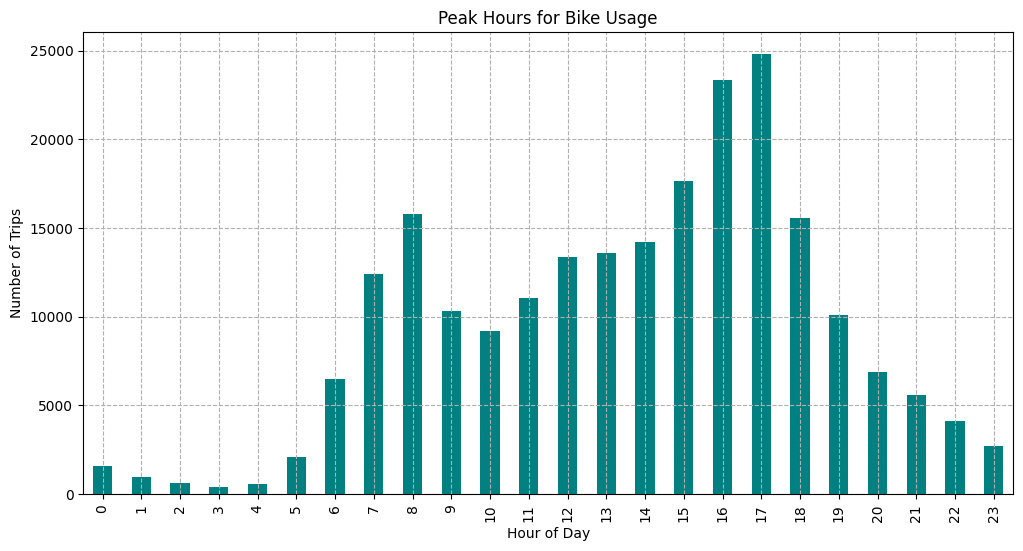

In [ ]:
data = load_data(file_path)
analyze_peak_times(data)


Here,

We are visualizing hour of the day vs number of trips.

This allows us to analyze the pattern of divvy bike usage as to what time of the day, there is high traffic and what times, people do not prefer it.

## Analysis 2: Membership Ratio


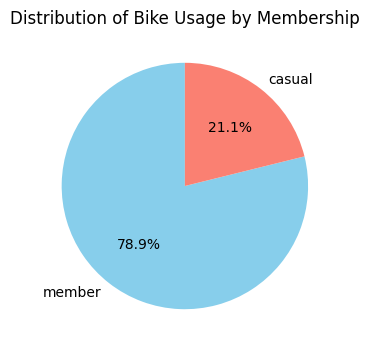

In [ ]:
def analyze_gender(data):
    gender_count = data['member_casual'].value_counts()
    plt.figure(figsize=(8, 4))
    gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title('Distribution of Bike Usage by Membership')
    plt.ylabel('')
    plt.show()


analyze_gender(data)


Here,

We plot a pie chart to show what percentage of riders are members of the service.

## Analysis 3: Electric vs Classic Bike Usage Ratio

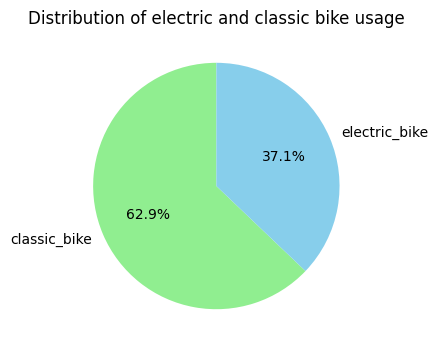

In [ ]:
def analyze_bike_type(data):
    gender_count = data['rideable_type'].value_counts()
    plt.figure(figsize=(8, 4))
    gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'skyblue'])
    plt.title('Distribution of electric and classic bike usage')
    plt.ylabel('')
    plt.show()


analyze_bike_type(data)


Here,

We plot a pie chart again, to show the percentage of riders preferring electric bike over classic bike.

## Analysis 4: Trip Duration Analysis

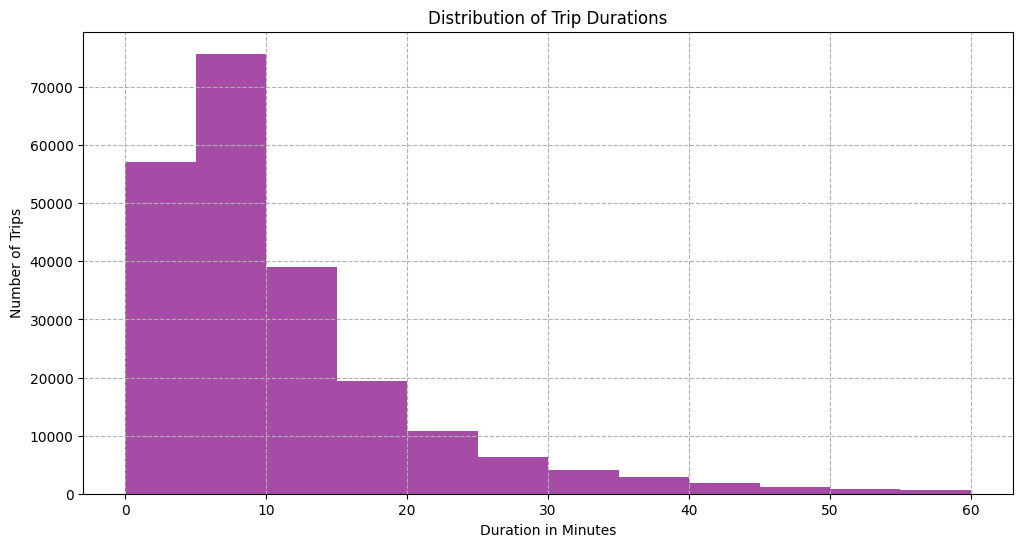

In [ ]:

def analyze_trip_durations(data):
    data['duration_minutes'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60
    plt.figure(figsize=(12, 6))
    plt.hist(data['duration_minutes'], bins=range(0, 61, 5), color='purple', alpha=0.7)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration in Minutes')
    plt.ylabel('Number of Trips')
    plt.grid(True, linestyle='--')
    plt.show()


analyze_trip_durations(data)


Here,

We plot a disjoint bar chart to show the analysis of duration of trips in minutes vs number of trips.

This shows a distribution skewed towards right, concluding people choose divvy for shorter commute.

## Analysis 5: Station Popularity Analysis

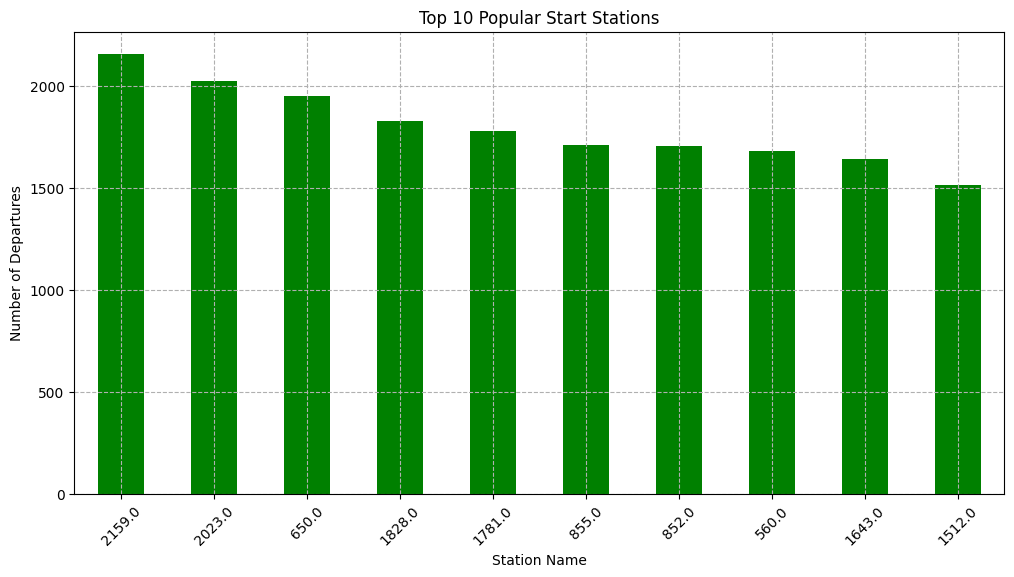

In [ ]:
def analyze_station_popularity(data):
    popular_stations = data['start_station_name_freq_encoded'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    popular_stations.plot(kind='bar', color='green')
    plt.title('Top 10 Popular Start Stations')
    plt.xlabel('Station Name')
    plt.ylabel('Number of Departures')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--')
    plt.show()



analyze_station_popularity(data)


Here,

We present the top 10 stations vs the number of trips started from these station. We have encoded the station names to maintain the privacy.

## Analysis 6: Mean Usage Time

In [ ]:
# Apply Differential Privacy to aggregate data
def apply_differential_privacy(data):
    epsilon = 1.0  # Diffrential privacy parameter
    data['duration'] = ((data['ended_at'] - data['started_at']).dt.total_seconds() / 60).astype(int)

    # Differential privacy to find mean duration
    mean_duration = BoundedMean(epsilon=epsilon,
    delta=0,  # Delta can be set to 0 for pure differential privacy
    lower_bound=0,
    upper_bound=1440,
    l0_sensitivity=1,
    linf_sensitivity=1)  # Assuming max duration per trip is 24 hours
    mean_duration.add_entries(data['duration'].tolist())
    dp_mean_duration = mean_duration.result()

    return dp_mean_duration



def print_bold_big(text):
    bold_big_text = f"\033[1m\033[4m\033[34m{text}\033[0m"  # Bold, underline, and blue color
    print(bold_big_text)


In [ ]:

bounded_mean = apply_differential_privacy(data)
bounded_mean = round(bounded_mean, 2)
bounded_mean = " Bounded Mean Usage Time " + str(bounded_mean)
print_bold_big(bounded_mean)


 Bounded Mean Usage Time 14.92


Here,

We compute the mean usage time for rides with divvy.

This analysis proves the previous conclusion of people choosing divvy for shorter commute.

The code uses a technique called Bounded Mean, which adds carefully calibrated noise to the mean calculation to ensure privacy while still providing useful aggregate statistics. The noise added is controlled by parameters such as epsilon, sensitivity bounds, and delta (for additional privacy guarantees).

THANK YOU!!


